In [1]:
import requests
import pandas as pd

In [2]:
r = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=Y30E2S63RTWADYO4')
r.text

'{\n    "Meta Data": {\n        "1. Information": "Daily Prices (open, high, low, close) and Volumes",\n        "2. Symbol": "MSFT",\n        "3. Last Refreshed": "2019-04-26",\n        "4. Output Size": "Full size",\n        "5. Time Zone": "US/Eastern"\n    },\n    "Time Series (Daily)": {\n        "2019-04-26": {\n            "1. open": "129.7000",\n            "2. high": "130.5152",\n            "3. low": "129.0200",\n            "4. close": "129.8900",\n            "5. volume": "23306041"\n        },\n        "2019-04-25": {\n            "1. open": "130.0600",\n            "2. high": "131.3700",\n            "3. low": "128.8300",\n            "4. close": "129.1500",\n            "5. volume": "38033892"\n        },\n        "2019-04-24": {\n            "1. open": "125.7900",\n            "2. high": "125.8500",\n            "3. low": "124.5200",\n            "4. close": "125.0100",\n            "5. volume": "31256980"\n        },\n        "2019-04-23": {\n            "1. open": "124

In [3]:
r_url = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=Y30E2S63RTWADYO4')

payload = {'function': 'TIME_SERIES_DAILY', 'symbol': 'MSFT', 'outputsize':'full', 'apikey':'Y30E2S63RTWADYO4'}
r_payload = requests.get('https://www.alphavantage.co/query', params=payload)

# Test if both results are the same string
r_url.text == r_payload.text

True

In [4]:
payload = {'function': 'TIME_SERIES_DAILY', 'symbol': 'MSFT', 'outputsize':'full', 'apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)
r.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2019-04-26',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2019-04-26': {'1. open': '129.7000',
   '2. high': '130.5152',
   '3. low': '129.0200',
   '4. close': '129.8900',
   '5. volume': '23306041'},
  '2019-04-25': {'1. open': '130.0600',
   '2. high': '131.3700',
   '3. low': '128.8300',
   '4. close': '129.1500',
   '5. volume': '38033892'},
  '2019-04-24': {'1. open': '125.7900',
   '2. high': '125.8500',
   '3. low': '124.5200',
   '4. close': '125.0100',
   '5. volume': '31256980'},
  '2019-04-23': {'1. open': '124.1000',
   '2. high': '125.5800',
   '3. low': '123.8300',
   '4. close': '125.4400',
   '5. volume': '24025521'},
  '2019-04-22': {'1. open': '122.6200',
   '2. high': '124.0000',
   '3. low': '122.5700',
   '4. close': '123.7600',
   '5. volume': '15648724'},
  '2019-04-18': {'1. open': '1

## TIME_SERIES_DAILY

In [5]:
payload = {'function': 'TIME_SERIES_DAILY', 'symbol': 'MSFT', 'outputsize':'compact', 'apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['2. Symbol']
data[company] = [[], []]
dates = list(r.json()['Time Series (Daily)'].keys())

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1].append(float(r.json()['Time Series (Daily)'].get(date)['4. close']))


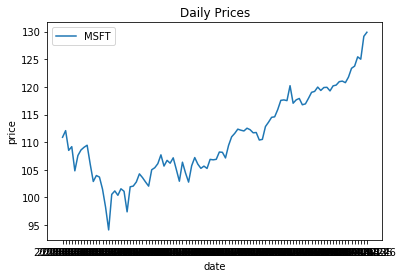

In [6]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0], data[company][1], label=company)

# label the plot
plt.title('Daily Prices')
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [7]:
data_frames = []

data_frames.append(data)

df_one = pd.DataFrame(data_frames[0])

## TIME_SERIES_WEEKLY

In [8]:
payload = {'function': 'TIME_SERIES_WEEKLY', 'symbol': 'MSFT', 'apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['2. Symbol']
data[company] = [[], []]
dates = list(r.json()['Weekly Time Series'].keys())

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1].append(float(r.json()['Weekly Time Series'].get(date)['4. close']))

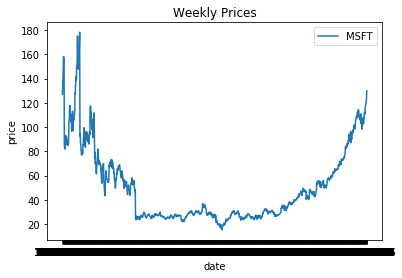

In [9]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0], data[company][1], label=company)

# label the plot
plt.title('Weekly Prices')
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
plt.show()

## TIME_SERIES_MONTHLY

In [11]:
payload = {'function': 'TIME_SERIES_MONTHLY', 'symbol': 'MSFT', 'apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['2. Symbol']
data[company] = [[], []]
dates = list(r.json()['Monthly Time Series'].keys())

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1].append(float(r.json()['Monthly Time Series'].get(date)['4. close']))

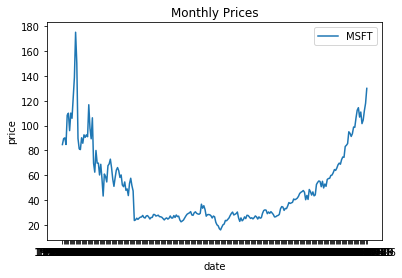

In [12]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0], data[company][1], label=company)

# label the plot
plt.title('Monthly Prices')
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
plt.show()

## STOCH (daily)

In [13]:
payload = {'function': 'STOCH', 'symbol': 'MSFT', 'interval': 'daily','apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['1: Symbol']
data[company] = [[], [[], []]]
dates = list(r.json()['Technical Analysis: STOCH'].keys())

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1][0].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowK']))
    data[company][1][1].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowD']))

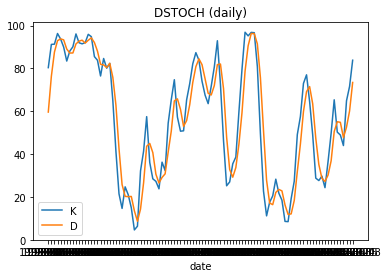

In [14]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0][:100], data[company][1][0][:100], label='K')
    plt.plot(data[company][0][:100], data[company][1][1][:100], label='D')

# label the plot
plt.title('DSTOCH (daily)')
plt.legend()
plt.xlabel('date')
plt.show()

## STOCH (weekly)

In [15]:
payload = {'function': 'STOCH', 'symbol': 'MSFT', 'interval': 'weekly','apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['1: Symbol']
data[company] = [[], [[], []]]
dates = list(r.json()['Technical Analysis: STOCH'].keys())[:100]

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1][0].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowK']))
    data[company][1][1].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowD']))

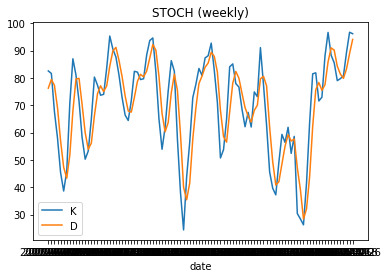

In [16]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0][:100], data[company][1][0], label='K')
    plt.plot(data[company][0][:100], data[company][1][1], label='D')

# label the plot
plt.title('STOCH (weekly)')
plt.legend()
plt.xlabel('date')
plt.show()

## STOCH (monthly)

In [17]:
payload = {'function': 'STOCH', 'symbol': 'MSFT', 'interval': 'monthly','apikey':'Y30E2S63RTWADYO4'}
r = requests.get('https://www.alphavantage.co/query', params=payload)

from collections import defaultdict
data = defaultdict(list)

company = r.json()['Meta Data']['1: Symbol']
data[company] = [[], [[], []]]
dates = list(r.json()['Technical Analysis: STOCH'].keys())

def sorting(L):
    splitup = L.split('-')
    return splitup[0], splitup[1], splitup[2]

dates.sort(key=sorting)

for date in dates:
    data[company][0].append(date)
    data[company][1][0].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowK']))
    data[company][1][1].append(float(r.json()['Technical Analysis: STOCH'].get(date)['SlowD']))

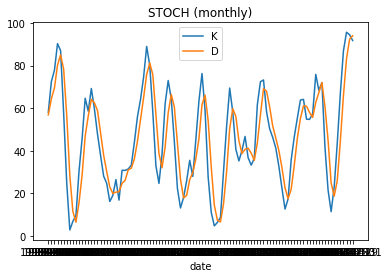

In [18]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for company in data:
    plt.plot(data[company][0][:100], data[company][1][0][:100], label='K')
    plt.plot(data[company][0][:100], data[company][1][1][:100], label='D')

# label the plot
plt.title('STOCH (monthly)')
plt.legend()
plt.xlabel('date')
plt.show()